In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# List of dataset filenames
datasets = {
    "Hill Climbing": "hill_climbing_dataset.csv",
    "Simulated Annealing": "simulated_annealing_dataset.csv",
    "Tabu Search": "tabu_dataset.csv"
}

# Function to analyze a dataset
def analyze_dataset(name, file):
    print(f"\nProcessing {name} Dataset\n" + "-"*50)
    
    try:
        # Load dataset
        data = pd.read_csv(file)

        # Display dataset information
        print("\nDataset Info:")
        print(data.info())

        # Display statistical summary
        print("\nStatistical Summary:")
        print(data.describe())

        # Display first few rows
        print("\nFirst Few Rows:")
        print(data.head())

        # Extract numeric features
        numeric_features = data.select_dtypes(include=["number"]).columns.tolist()
        print("\nNumeric Features:", numeric_features)

        # Calculate and print statistics for numeric features
        for feature in numeric_features:
            print(f"\nFeature: {feature}")
            print(f"  Mean: {data[feature].mean()}")
            print(f"  Median: {data[feature].median()}")
            print(f"  Standard Deviation: {data[feature].std()}")
            print(f"  Minimum: {data[feature].min()}")
            print(f"  Maximum: {data[feature].max()}")
        
        # Count missing values per column
        missing_counts = data.isnull().sum()
        print("\nMissing Values per Column:")
        print(missing_counts)

        # Define non-numeric features
        non_numeric_features = data.select_dtypes(exclude=["number"]).columns.tolist()

        # Bar plot for non-numeric data
        for feature in non_numeric_features:
            plt.figure(figsize=(12, 8))
            sns.countplot(data=data, x=feature)
            plt.title(f'{name} - Distribution of {feature}')
            plt.xlabel(feature)
            plt.ylabel('Count')
            plt.xticks(rotation=90)
            plt.show()

        # Plot histograms for all numeric features
        for feature in numeric_features:
            plt.figure(figsize=(10, 6))
            plt.hist(data[feature].dropna(), bins=30, alpha=0.7)
            plt.title(f'{name} - Histogram of {feature}')
            plt.xlabel(feature)
            plt.ylabel('Frequency')
            plt.show()

    except Exception as e:
        print(f"Error processing {name}: {e}")

# Process each dataset separately
for name, file in datasets.items():
    analyze_dataset(name, file)


In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# List of datasets
datasets = {
    "Hill Climbing": "hill_climbing_dataset.csv",
    "Simulated Annealing": "simulated_annealing_dataset.csv",
    "Tabu Search": "tabu_dataset.csv"
}

# Function to preprocess data and train models
def process_dataset(name, file):
    print(f"\nProcessing {name} Dataset\n" + "-"*50)

    try:
        # Load dataset
        data = pd.read_csv(file)

        # Drop rows and columns with missing values
        data_cleaned = data.dropna()
        data_cleaned = data_cleaned.dropna(axis=1)

        # Ensure target feature exists
        if 'evaluation' not in data_cleaned.columns:
            print(f"Skipping {name}: 'evaluation' column not found")
            return

        # Splitting features and target
        X = data_cleaned.drop(columns=['evaluation'])
        y = data_cleaned['evaluation']

        # Handle categorical variables (One-hot encoding)
        X = pd.get_dummies(X, drop_first=True)

        # Handle missing values (fill with mean for numerical columns)
        X.fillna(X.mean(), inplace=True)

        # Feature Scaling
        scaler = StandardScaler()
        X_scaled = scaler.fit_transform(X)

        # Train-test split
        X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.25, random_state=42)

        # Dictionary to store model results
        model_results = {}

        # Train SVM
        svm = SVC(kernel='rbf', C=1.0)
        svm.fit(X_train, y_train)
        y_pred_svm = svm.predict(X_test)
        model_results["SVM"] = {
            "accuracy": accuracy_score(y_test, y_pred_svm),
            "precision": precision_score(y_test, y_pred_svm, average="weighted"),
            "recall": recall_score(y_test, y_pred_svm, average="weighted"),
            "f1": f1_score(y_test, y_pred_svm, average="weighted")
        }

        # Train Random Forest
        rf = RandomForestClassifier(n_estimators=100, random_state=42)
        rf.fit(X_train, y_train)
        y_pred_rf = rf.predict(X_test)
        model_results["Random Forest"] = {
            "accuracy": accuracy_score(y_test, y_pred_rf),
            "precision": precision_score(y_test, y_pred_rf, average="weighted"),
            "recall": recall_score(y_test, y_pred_rf, average="weighted"),
            "f1": f1_score(y_test, y_pred_rf, average="weighted")
        }

        # Train Logistic Regression
        log_reg = LogisticRegression(max_iter=500)
        log_reg.fit(X_train, y_train)
        y_pred_log = log_reg.predict(X_test)
        model_results["Logistic Regression"] = {
            "accuracy": accuracy_score(y_test, y_pred_log),
            "precision": precision_score(y_test, y_pred_log, average="weighted"),
            "recall": recall_score(y_test, y_pred_log, average="weighted"),
            "f1": f1_score(y_test, y_pred_log, average="weighted")
        }

        # Print results
        for model, scores in model_results.items():
            print(f"\n{name} - {model} Results:")
            print(f"  Accuracy: {scores['accuracy']:.4f}")
            print(f"  Precision: {scores['precision']:.4f}")
            print(f"  Recall: {scores['recall']:.4f}")
            print(f"  F1 Score: {scores['f1']:.4f}")

        # Identify best model based on F1-score
        best_model = max(model_results, key=lambda x: model_results[x]["f1"])
        print(f"\nBest Model for {name}: {best_model} with F1-score: {model_results[best_model]['f1']:.4f}")

    except Exception as e:
        print(f"Error processing {name}: {e}")

# Process each dataset separately
for name, file in datasets.items():
    process_dataset(name, file)



Processing Hill Climbing Dataset
--------------------------------------------------
Skipping Hill Climbing: 'evaluation' column not found

Processing Simulated Annealing Dataset
--------------------------------------------------
Skipping Simulated Annealing: 'evaluation' column not found

Processing Tabu Search Dataset
--------------------------------------------------
Skipping Tabu Search: 'evaluation' column not found


In [15]:
import random
import numpy as np

# Define actions and simple state space.
actions = ['C', 'D']
states = [None, 'C', 'D']  # Opponent's last move: None for first round.

# Define the payoff matrix (example values).
def get_reward(agent_action, opponent_action):
    # Using a typical PD reward scheme (adjust as needed)
    if agent_action == 'C' and opponent_action == 'C':
        return 3
    elif agent_action == 'C' and opponent_action == 'D':
        return 0
    elif agent_action == 'D' and opponent_action == 'C':
        return 5
    elif agent_action == 'D' and opponent_action == 'D':
        return 1

# Opponent strategy: Tit-for-Tat.
def opponent_policy(agent_last_move):          
    return 'C' if agent_last_move is None else agent_last_move

# Q-learning parameters.
alpha = 0.001         # Learning rate.
gamma = 0.9         # Discount factor.
epsilon = 0.9      # Exploration rate.
num_episodes = 20000
episode_length = 2000  # Rounds per episode.

# Initialize Q-table for all (state, action) pairs.
Q = {(s, a): 0.0 for s in states for a in actions}

# Epsilon-greedy policy.
def choose_action(state, epsilon):
    if random.random() < epsilon:
        return random.choice(actions)
    else:
        q_values = [Q[(state, a)] for a in actions]
        # Choose the action with the maximum Q-value.
        return actions[np.argmax(q_values)]

# Q-learning training loop.
for episode in range(num_episodes):
    state = None  # Starting state (no previous opponent move).
    agent_last_move = None
    for t in range(episode_length):
        action = choose_action(state, epsilon)
        # Opponent uses Tit-for-Tat.
        opponent_action = opponent_policy(agent_last_move)
        reward = get_reward(action, opponent_action)
        next_state = opponent_action
        
        # Q-learning update: using max_{a'} Q(next_state, a').
        best_next_action = max(actions, key=lambda a: Q[(next_state, a)])
        td_target = reward + gamma * Q[(next_state, best_next_action)]
        Q[(state, action)] += alpha * (td_target - Q[(state, action)])
        
        # Transition to next state.
        state = next_state
        agent_last_move = action

# Display learned Q-values.
print("Learned Q-values:")
for state in states:
    for action in actions:
        print(f"State: {state}, Action: {action}, Q-value: {Q[(state, action)]:.2f}")

# Derive policy.
policy = {state: max(actions, key=lambda a: Q[(state, a)]) for state in states}
print("\nLearned Policy (state: best action):")
print(policy)


KeyboardInterrupt: 

Action      C      D
State               
C       18.36  19.30
D       17.99  19.37
None    21.44  23.40


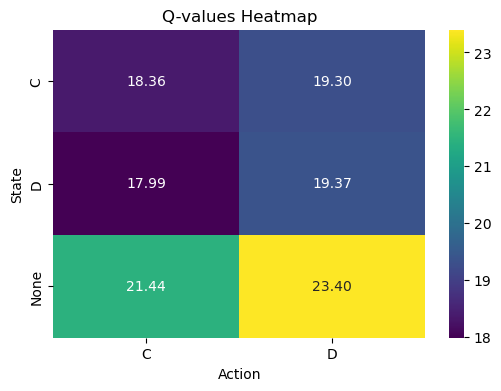

In [30]:
import matplotlib.pyplot as plt
import pandas as pd

# Create a DataFrame with the Q-values
data = {
    "State": ["None", "None", "C", "C", "D", "D"],
    "Action": ["C", "D", "C", "D", "C", "D"],
    "Q-value": [21.44, 23.40, 18.36, 19.30, 17.99, 19.37]
}

df = pd.DataFrame(data)

# Pivot the data for easier plotting
pivot_df = df.pivot(index='State', columns='Action', values='Q-value')
print(pivot_df)
import seaborn as sns
import matplotlib.pyplot as plt

# Using the pivot table from before
plt.figure(figsize=(6,4))
sns.heatmap(pivot_df, annot=True, cmap='viridis', fmt=".2f")
plt.title('Q-values Heatmap')
plt.xlabel('Action')
plt.ylabel('State')
plt.show()


Aggregated Q-values:
Action          C          D
State                       
C       20.258235  20.534268
D       20.407215  20.396737
None    20.436341  20.580843


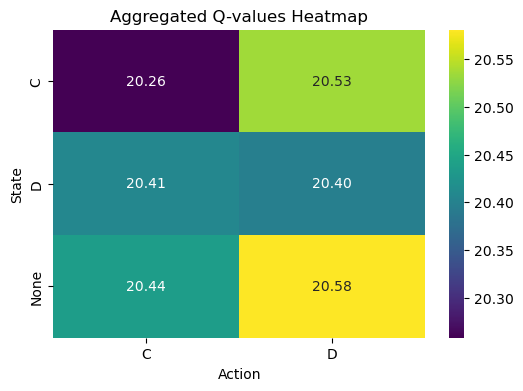

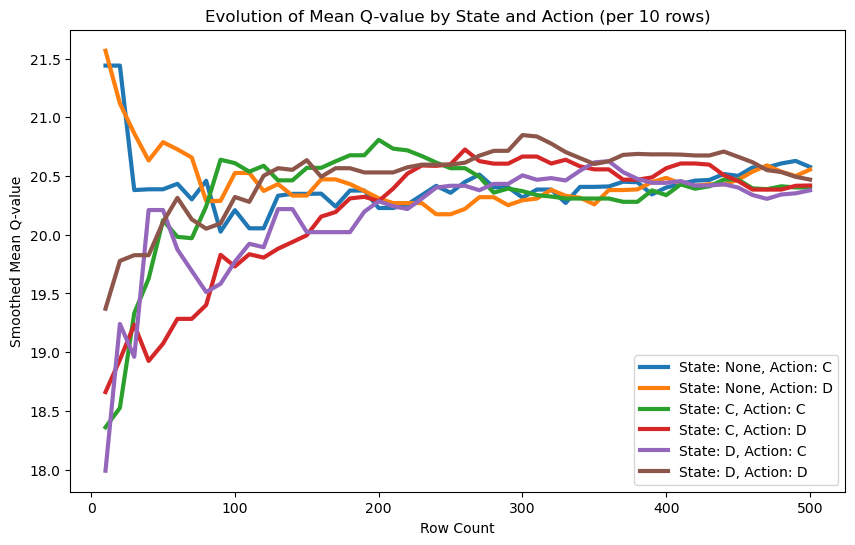


Best strategy at each evolution step:
At row 10: Best Strategy = State: None, Action: D with Q-value 21.57
At row 20: Best Strategy = State: None, Action: C with Q-value 21.44
At row 30: Best Strategy = State: None, Action: D with Q-value 20.86
At row 40: Best Strategy = State: None, Action: D with Q-value 20.63
At row 50: Best Strategy = State: None, Action: D with Q-value 20.79
At row 60: Best Strategy = State: None, Action: D with Q-value 20.73
At row 70: Best Strategy = State: None, Action: D with Q-value 20.66
At row 80: Best Strategy = State: None, Action: C with Q-value 20.46
At row 90: Best Strategy = State: C, Action: C with Q-value 20.64
At row 100: Best Strategy = State: C, Action: C with Q-value 20.61
At row 110: Best Strategy = State: C, Action: C with Q-value 20.54
At row 120: Best Strategy = State: C, Action: C with Q-value 20.59
At row 130: Best Strategy = State: D, Action: D with Q-value 20.57
At row 140: Best Strategy = State: D, Action: D with Q-value 20.55
At row 1

In [76]:
import random
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Q-learning parameters (not actively used in this code snippet).
alpha = 0.1         # Learning rate.
gamma = 0.7         # Discount factor.
epsilon = 0.9       # Exploration rate.
num_episodes = 20000
episode_length = 2000  # Rounds per episode.

# Original dataset
data = {
    "State": ["None", "None", "C", "C", "D", "D"],
    "Action": ["C", "D", "C", "D", "C", "D"],
    "Q-value": [21.44, 23.40, 18.36, 19.30, 17.99, 19.37]
}

# Create DataFrame from original data
df = pd.DataFrame(data)

# Define possible values for additional complexity
state_options = ["None", "C", "D"]
action_options = ["C", "D"]

# Add 500 extra rows with randomly generated Q-values
additional_rows = []
for _ in range(500):
    new_state = random.choice(state_options)
    new_action = random.choice(action_options)
    new_qvalue = round(random.uniform(17.0, 24.0), 2)
    additional_rows.append({
        "State": new_state,
        "Action": new_action,
        "Q-value": new_qvalue
    })

# Append new rows to the DataFrame
df_extra = pd.DataFrame(additional_rows)
df = pd.concat([df, df_extra], ignore_index=True)

# --- Plotting the Heatmap (Aggregated) ---
pivot_df = df.pivot_table(index='State', columns='Action', values='Q-value', aggfunc='mean')
print("Aggregated Q-values:")
print(pivot_df)

plt.figure(figsize=(6, 4))
sns.heatmap(pivot_df, annot=True, cmap='viridis', fmt=".2f")
plt.title('Aggregated Q-values Heatmap')
plt.xlabel('Action')
plt.ylabel('State')

# Save the heatmap to a file
plt.savefig("aggregated_heatmap.png", dpi=300, bbox_inches='tight')
plt.show()

# --- Evolution Chart (Mean Q-value per 10 rows) with Smoothing ---
bin_size = 10
n_bins = len(df) // bin_size

# Initialize dictionary to store evolution data for each (State, Action)
evolution = {(state, action): [] for state in state_options for action in action_options}
x_axis = []  # x_axis will represent the end row number of each bin

# Iterate through the dataset in bins of bin_size rows
for i in range(n_bins):
    start = i * bin_size
    end = start + bin_size
    sub_df = df.iloc[start:end]
    x_axis.append(end)
    
    # Group by State and Action and compute the mean Q-value for this bin
    grouped = sub_df.groupby(['State', 'Action'])['Q-value'].mean()
    for (state, action) in evolution.keys():
        value = grouped.get((state, action), None)
        evolution[(state, action)].append(value)

# Set the window for the rolling average (smoothing)
window = 100

# Prepare a dictionary to store the smoothed series for each (State, Action)
smoothed_evolution = {}
for key, values in evolution.items():
    series = pd.Series(values).rolling(window=window, min_periods=1).mean()
    smoothed_evolution[key] = series

# Plot evolution curves for each combination with smoothing
plt.figure(figsize=(10, 6))
for (state, action), series in smoothed_evolution.items():
    plt.plot(x_axis, series, label=f"State: {state}, Action: {action}", linewidth=3)
plt.xlabel("Row Count")
plt.ylabel("Smoothed Mean Q-value")
plt.title("Evolution of Mean Q-value by State and Action (per 10 rows)")
plt.legend()
plt.show()

# --- Determine the Best Strategy at Each Evolution Step ---
print("\nBest strategy at each evolution step:")
best_strategy = []  # List to store best strategy info for each bin

for i in range(n_bins):
    best_val = None
    best_strat = None
    # Check each (state, action) pair's smoothed Q-value at bin i
    for (state, action), series in smoothed_evolution.items():
        q_val = series.iloc[i]
        if best_val is None or (q_val is not None and q_val > best_val):
            best_val = q_val
            best_strat = (state, action)
    best_strategy.append((x_axis[i], best_strat, best_val))
    print(f"At row {x_axis[i]}: Best Strategy = State: {best_strat[0]}, Action: {best_strat[1]} with Q-value {best_val:.2f}")


Opponent: GTFT
Learned Policy: {None: 'D', 'C': 'D', 'D': 'D'}
Sample Q-values: {(None, 'C'): 34.134105517449335, (None, 'D'): 35.89578336235625, ('C', 'C'): 31.915902635633795, ('C', 'D'): 34.103638850639115} 

Opponent: STFT
Learned Policy: {None: 'D', 'C': 'D', 'D': 'C'}
Sample Q-values: {(None, 'C'): 18.58993474271247, (None, 'D'): 18.95942762516532, ('C', 'C'): 19.48172665441031, ('C', 'D'): 21.019629277528473} 

Opponent: Random
Learned Policy: {None: 'D', 'C': 'D', 'D': 'D'}
Sample Q-values: {(None, 'C'): 28.309141554144865, (None, 'D'): 30.714815063587825, ('C', 'C'): 27.429748972728323, ('C', 'D'): 28.731330813778264} 

Opponent: GrimTrigger
Learned Policy: {None: 'D', 'C': 'D', 'D': 'D'}
Sample Q-values: {(None, 'C'): 12.993121033419042, (None, 'D'): 15.105393880687101, ('C', 'C'): 9.587235266875313, ('C', 'D'): 10.98698066615651} 

Opponent: WSLS
Learned Policy: {None: 'D', 'C': 'D', 'D': 'D'}
Sample Q-values: {(None, 'C'): 21.745781819881554, (None, 'D'): 23.70365161544534,

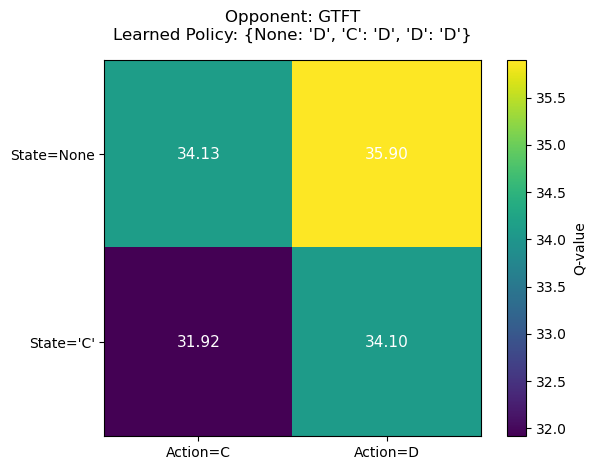

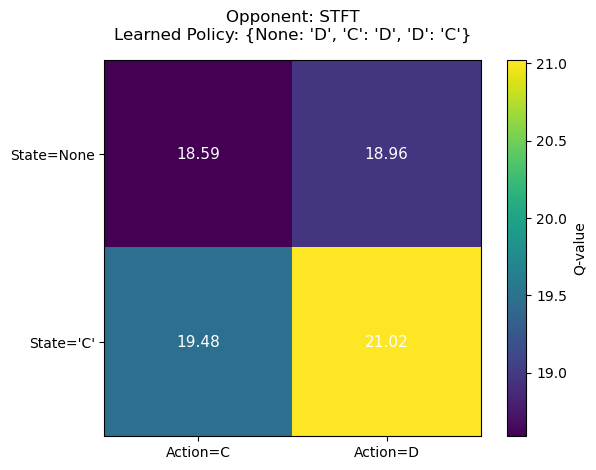

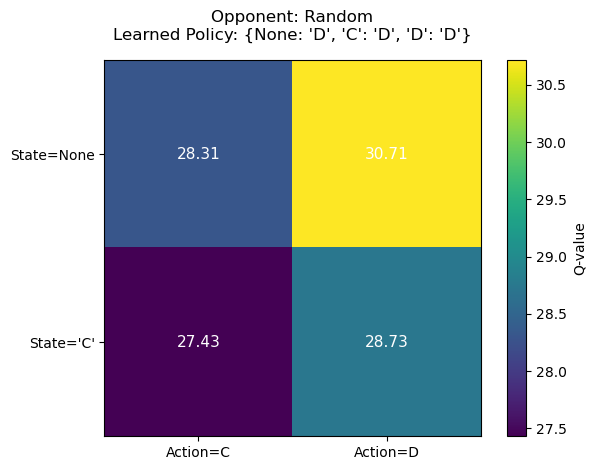

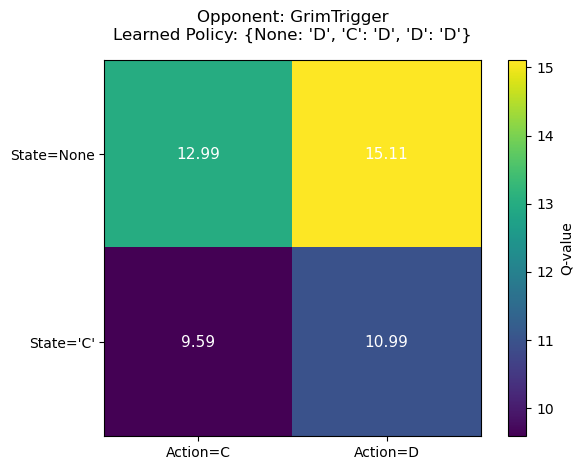

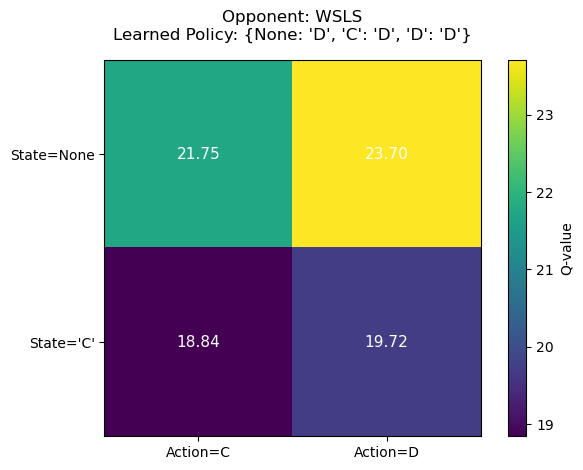

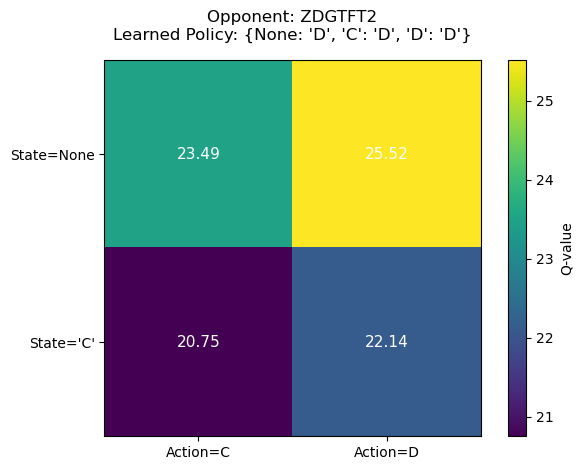

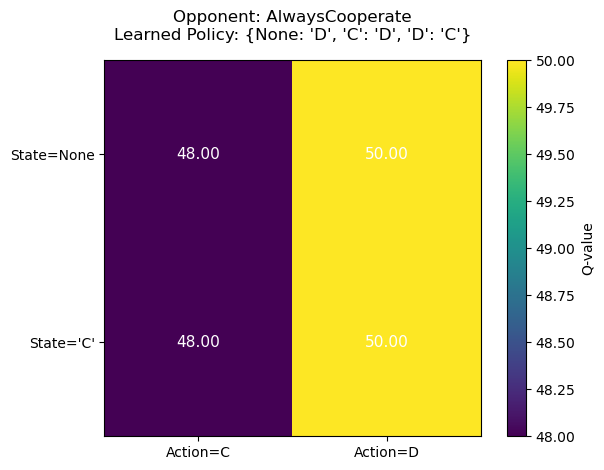

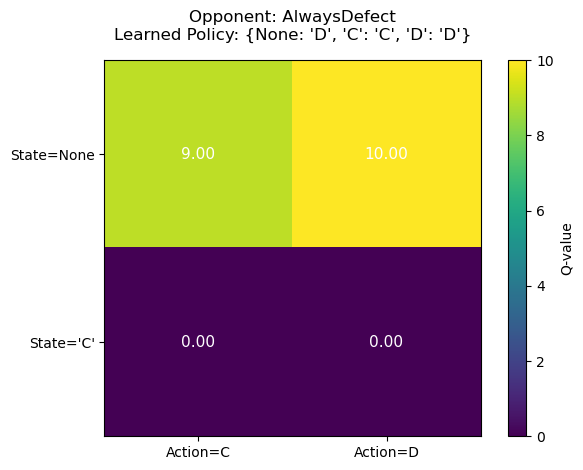

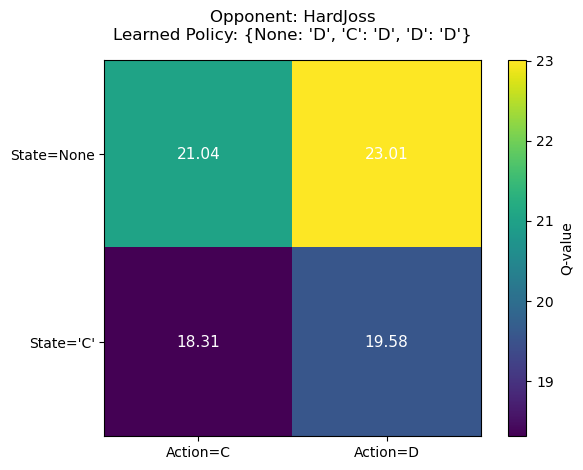

{'State': ['None', 'None', 'C', 'C', 'D', 'D', 'C', 'None', 'C', 'None', 'D', 'None', 'None', 'C', 'C', 'D', 'C', 'D', 'None', 'D', 'D', 'C', 'D', 'D', 'None', 'D', 'None', 'C', 'C', 'C', 'None', 'D', 'D', 'None', 'D', 'D', 'C', 'D', 'D', 'C', 'D', 'None', 'None', 'D', 'D', 'D', 'None', 'C', 'None', 'D', 'None', 'C', 'D', 'None', 'None', 'None', 'D', 'None', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'None', 'C', 'None', 'None', 'C', 'D', 'D', 'None', 'D', 'D', 'None', 'None', 'None', 'C', 'None', 'C', 'C', 'C', 'C', 'None', 'None', 'None', 'D', 'C', 'D', 'C', 'D', 'None', 'D', 'C', 'D', 'D', 'D', 'C', 'C', 'None', 'None', 'None', 'None', 'None', 'D'], 'Action': ['C', 'D', 'C', 'D', 'C', 'D', 'D', 'C', 'D', 'C', 'C', 'C', 'D', 'D', 'D', 'D', 'C', 'D', 'C', 'D', 'C', 'C', 'C', 'D', 'D', 'D', 'D', 'D', 'C', 'C', 'D', 'D', 'D', 'C', 'D', 'C', 'C', 'C', 'C', 'C', 'D', 'C', 'D', 'C', 'D', 'D', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'D', 'C', 'C', 'D', 'C', 'C', 'C', 'C', 'C', 'D', 'D', 'D', 'D', 'D', '